In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [23]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 random values for X
X = np.random.rand(100, 1) * 10  # Scale X between 0 and 10

# Define true relationship
true_slope, true_intercept = 3, 5

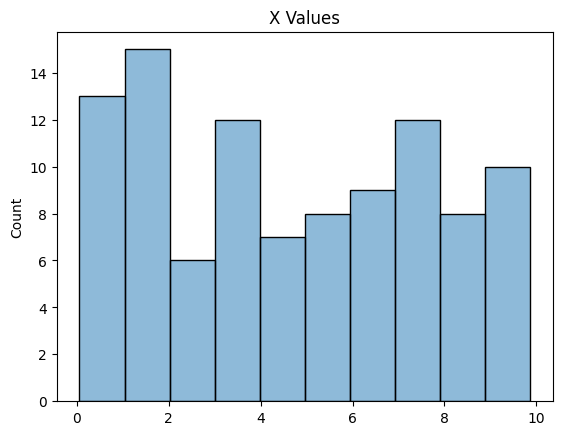

In [72]:
# Visualize the values on X
sns.histplot(
    data=X,
    bins=10,
    legend=False
)
plt.title("X Values")
plt.show()

In [24]:
# Generate y values with different noise levels
y_low_noise = true_slope * X + true_intercept + np.random.randn(100, 1) * 0.5
y_mid_noise = true_slope * X + true_intercept + np.random.randn(100, 1) * 2
y_high_noise = true_slope * X + true_intercept + np.random.randn(100, 1) * 5

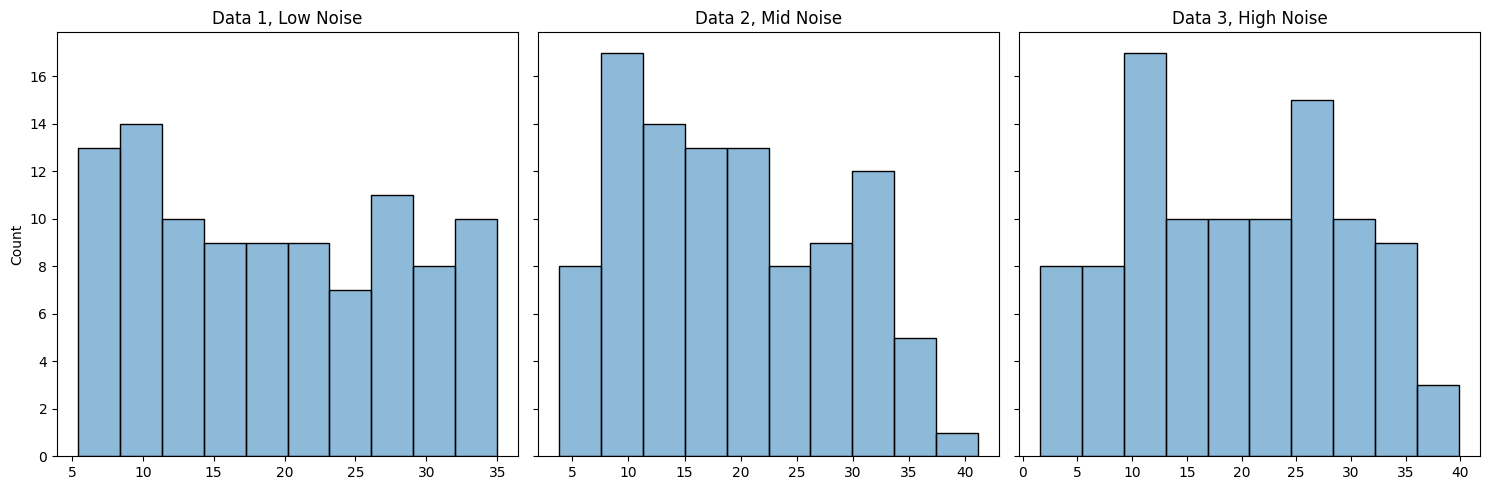

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Data for low noise
sns.histplot(y_low_noise, bins=10, ax=axes[0], legend=False)
axes[0].set_title("Data 1, Low Noise")
axes[0].set_ylabel("Count")

# Data for mid noise
sns.histplot(y_mid_noise, bins=10, ax=axes[1], legend=False)
axes[1].set_title("Data 2, Mid Noise")

# Data for high noise
sns.histplot(y_high_noise, bins=10, ax=axes[2], legend=False)
axes[2].set_title("Data 3, High Noise")

plt.tight_layout()
plt.show()

In [92]:
# Train regression models
model_low_noise = LinearRegression().fit(X, y_low_noise)
model_mid_noise = LinearRegression().fit(X, y_mid_noise)
model_high_noise = LinearRegression().fit(X, y_high_noise)

# Predictions
y_pred_low_noise = model_low_noise.predict(X)
y_pred_mid_noise = model_mid_noise.predict(X)
y_pred_high_noise = model_high_noise.predict(X)

In [93]:
# Compute R² scores
r2_low_noise = model_low_noise.score(X, y_low_noise)
r2_mid_noise = model_mid_noise.score(X, y_mid_noise)
r2_high_noise = model_high_noise.score(X, y_high_noise)

# Print R² scores
print(f"R² Score (Low Noise): {r2_low_noise:.4f}")
print(f"R² Score (Mid Noise): {r2_mid_noise:.4f}")
print(f"R² Score (High Noise): {r2_high_noise:.4f}")

R² Score (Low Noise): 0.9974
R² Score (Mid Noise): 0.9430
R² Score (High Noise): 0.8376


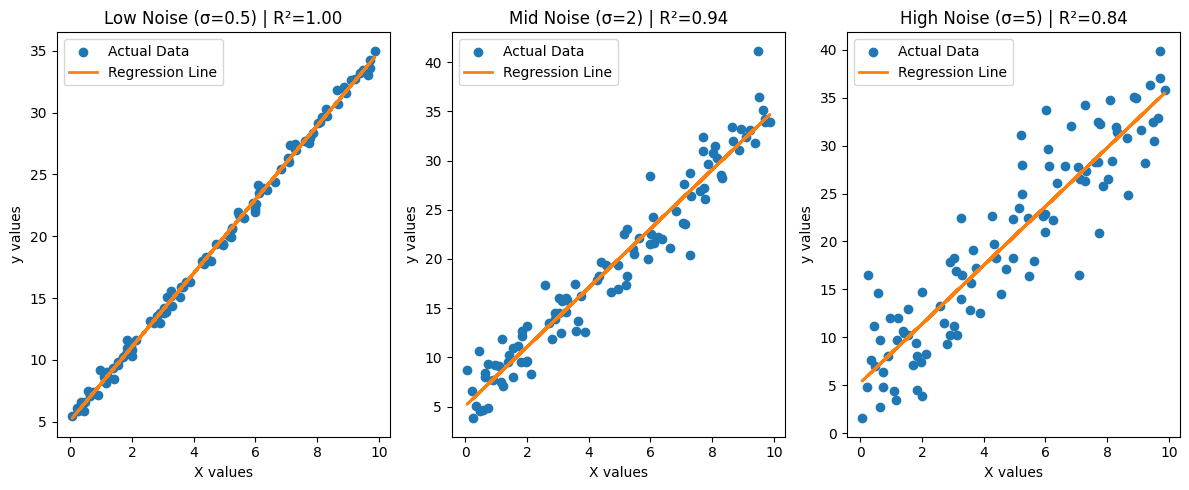

In [110]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot: Low Noise
axes[0].scatter(X, y_low_noise, color='tab:blue', label="Actual Data")
axes[0].plot(X, y_pred_low_noise, color='tab:orange', linewidth=2, label="Regression Line")
axes[0].set_title(f"Low Noise (σ=0.5) | R²={r2_low_noise:.2f}")
axes[0].set_xlabel("X values")
axes[0].set_ylabel("y values")
axes[0].legend()

# Plot: Mid Noise
axes[1].scatter(X, y_mid_noise, color='tab:blue', label="Actual Data")
axes[1].plot(X, y_pred_mid_noise, color='tab:orange', linewidth=2, label="Regression Line")
axes[1].set_title(f"Mid Noise (σ=2) | R²={r2_mid_noise:.2f}")
axes[1].set_xlabel("X values")
axes[1].set_ylabel("y values")
axes[1].legend()

# Plot: High Noise
axes[2].scatter(X, y_high_noise, color='tab:blue', label="Actual Data")
axes[2].plot(X, y_pred_high_noise, color='tab:orange', linewidth=2, label="Regression Line")
axes[2].set_title(f"High Noise (σ=5) | R²={r2_high_noise:.2f}")
axes[2].set_xlabel("X values")
axes[2].set_ylabel("y values")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()